
# Project: medical appointment no shows data analys


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction

> Medical appointment no shows dataset analysis: 
> Cet ensemble de données contient des renseignements sur plus de 11 000 patients au Brésil, des renseignements sur leurs antécédents médicaux et nous devons examiner cet ensemble de données pour déterminer les facteurs qui influent sur la présence des patients au rendez-vous prévu. Les principales questions sur lesquelles nous voulons nous concentrer sont les suivantes : Qu’est-ce qui fait que les patients ne se présentent pas à leur rendez-vous à l’hôpital? pour répondre à cette question, 

Dataset 
>PatientId - Identification du patient.
AppointmentID - Identification du rendez-vous.
Gender- Sexe du patient (homme ou femme).
ScheduledDay - Le patient de jour fixe son rendez-vous.
AppointmentDay - Le jour du rendez-vous réel lorsque le patient doit consulter le médecin.
Age - âge du patient
Neighbourhood - Emplacement de l’hôpital.
Scholarship - Indique si le patient est inscrit ou non dans le programme de bien-être brésilien Bolsa Familia (0 pour non et 1 pour Oui).
Hipertension - Indique si le patient a ou non de l’hypertension (0 pour non et 1 pour oui).
Diabetes - Indique si le patient a le diabète ou non (0 pour non et 1 pour oui).
Alcoholism - Indique si le patient est alcoolique ou non (0 pour non et 1 pour oui).
Handicap - Indique si le patient a ou non un handicap (sur une échelle de 0 à 4 )
SMS_received = Indique si le patient a reçu un SMS (0 pour non et 1 pour oui)
No-show = Indique si le patient a assisté ou non au rendez-vous (Oui pour ne s’est pas présenté, Non pour la présentation)

# # Questions

Question 1 (Pourcentage de patients boursiers par rapport au nombre total de patients)
Question 2 (Combien de personnes viennent au rendez-vous ?)
Question 3 (quel est la ratio d'assiduité en fonction du sexe?)
Question 4 (Lequel des hommes et des femmes est le plus déterminé à assister à un rendez-vous?)
Question 5 (l'age a t'il un impact sur l'assiduité ?)
question 6 (quel sexe peut etre le plus alcoolique ?)


In [1]:
# importer les bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
# chargement de notre jeu de données 
df=pd.read_csv('medical_data.csv')
df.head()

PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0             0      No  
2         0           0        0             0      No  
3         0           0        0             0      No  
4         1           0        0             0      No

<a id='wrangling'></a>
# Traitement des données 



## Propriétées générale

1 - notre jeu de donnée a été chargé avec la fonction df=pd.read_cvs('chemin')
2 - la fonction df.head affiche les 5 premières lignes de notre jeu de données 
Entrons un peu dans les détails 

In [3]:
#déterminon les dimension de notre jeu de données 
df.shape

(110527, 14)

on remarque que notre jeu de données contient 110527 lignes et 14 colones (110527*14)

In [4]:
#les différents types de données de chaque colone 
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

ici, on constate deux erreurs sur les colones ScheduledDay et AppointmentDay qui sontt présenté comme étant de types object en lieu place de datetime

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


on remarque que toutes les valeurs sont présentes dans notre jeu de données. 
cela peut etre vérififier avec le code df.isnull

In [6]:
#vérifier les valeurs manquantes 
df.isnull().sum().sum()

0

Nous avons en sortie 0 valeur manquante donc notre jeu de données est complète

In [7]:
#aperçu statistique descriptive
df.describe()

PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.921784e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172614e+12   5.640286e+06      18.000000       0.000000   
50%    3.173184e+13   5.680573e+06      37.000000       0.000000   
75%    9.439172e+13   5.725524e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       4.000000   

        SMS_received  
count  110527.000000  
mean        0.321026  
std         0.466873  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000

Nous avons surlover de façon brève quelques statistiques descriptives sur nos différents colones 

In [8]:
#voyons le nombre de valeur que prend chaque colone 
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [9]:
#vérifions les doublons
df.duplicated().sum()

0

nous avons en sortie aucun doublon

In [10]:
#vérifie si les valeurs de la colone age sont au norme
df_age = df.query("Age<0")
df_age

PatientId  AppointmentID Gender          ScheduledDay  \
99832  4.659432e+14        5775010      F  2016-06-06T08:58:13Z   

             AppointmentDay  Age Neighbourhood  Scholarship  Hipertension  \
99832  2016-06-06T00:00:00Z   -1         ROMÃO            0             0   

       Diabetes  Alcoholism  Handcap  SMS_received No-show  
99832         0           0        0             0      No

nous avons une ligne avec un age inférieur à 0

# ## Conclusion traitement de données 

Après l'étape de traitement de données, nous pouvons retenir les remarques suivantes :
1- Supprimer l'age inférieur à 0
2- les colones ScheduledDay et AppointmentDay doit etre de type dateTime 
3- les colones PatientId & AppointmentID ne serviront pas dans notre étude 
4- il n'y a pas de valeur nulle
5- il n'y a de valeur en double

Nous pouvons passer à la phase de nettoyage



## Nettoyage des données (supression de colone ['PatientId', 'AppointmentID], Age<0)

In [11]:
# supression de colone ['PatientId', 'AppointmentID]
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)
df.head()

Gender          ScheduledDay        AppointmentDay  Age      Neighbourhood  \
0      F  2016-04-29T18:38:08Z  2016-04-29T00:00:00Z   62    JARDIM DA PENHA   
1      M  2016-04-29T16:08:27Z  2016-04-29T00:00:00Z   56    JARDIM DA PENHA   
2      F  2016-04-29T16:19:04Z  2016-04-29T00:00:00Z   62      MATA DA PRAIA   
3      F  2016-04-29T17:29:31Z  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI   
4      F  2016-04-29T16:07:23Z  2016-04-29T00:00:00Z   56    JARDIM DA PENHA   

   Scholarship  Hipertension  Diabetes  Alcoholism  Handcap  SMS_received  \
0            0             1         0           0        0             0   
1            0             0         0           0        0             0   
2            0             0         0           0        0             0   
3            0             0         0           0        0             0   
4            0             1         1           0        0             0   

  No-show  
0      No  
1      No  
2      No  
3      No  
4      No

le nouveau jeu de données ne contient plus les colones PatientID et AppointmentID

In [12]:
#suppression de la colone avec age négatif
df.drop(df_age.index, inplace = True)

In [13]:
#permet de voir si la colone a été supprimé
df.query("Age<0")

Empty DataFrame
Columns: [Gender, ScheduledDay, AppointmentDay, Age, Neighbourhood, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received, No-show]
Index: []

In [14]:
#coversion du type de données de la colone ScheduledDay en datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

In [15]:
#coversion du type de données de la colone AppointmentDay en datetime
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [16]:
#on renomme la colone No-show par showed parce que le précédent posera un problème de lecture
df.rename(columns={'No-show':'showed'}, inplace=True)
df.head()

Gender              ScheduledDay            AppointmentDay  Age  \
0      F 2016-04-29 18:38:08+00:00 2016-04-29 00:00:00+00:00   62   
1      M 2016-04-29 16:08:27+00:00 2016-04-29 00:00:00+00:00   56   
2      F 2016-04-29 16:19:04+00:00 2016-04-29 00:00:00+00:00   62   
3      F 2016-04-29 17:29:31+00:00 2016-04-29 00:00:00+00:00    8   
4      F 2016-04-29 16:07:23+00:00 2016-04-29 00:00:00+00:00   56   

       Neighbourhood  Scholarship  Hipertension  Diabetes  Alcoholism  \
0    JARDIM DA PENHA            0             1         0           0   
1    JARDIM DA PENHA            0             0         0           0   
2      MATA DA PRAIA            0             0         0           0   
3  PONTAL DE CAMBURI            0             0         0           0   
4    JARDIM DA PENHA            0             1         1           0   

   Handcap  SMS_received showed  
0        0             0     No  
1        0             0     No  
2        0             0     No  
3        0             0     No  
4        0             0     No

In [17]:
#convert les variables qualitatitatives de la colone No-show en variable quantitative 
df["showed"] = df["showed"].apply(lambda x : 1 if x =="No" else 0 )
df.head()

Gender              ScheduledDay            AppointmentDay  Age  \
0      F 2016-04-29 18:38:08+00:00 2016-04-29 00:00:00+00:00   62   
1      M 2016-04-29 16:08:27+00:00 2016-04-29 00:00:00+00:00   56   
2      F 2016-04-29 16:19:04+00:00 2016-04-29 00:00:00+00:00   62   
3      F 2016-04-29 17:29:31+00:00 2016-04-29 00:00:00+00:00    8   
4      F 2016-04-29 16:07:23+00:00 2016-04-29 00:00:00+00:00   56   

       Neighbourhood  Scholarship  Hipertension  Diabetes  Alcoholism  \
0    JARDIM DA PENHA            0             1         0           0   
1    JARDIM DA PENHA            0             0         0           0   
2      MATA DA PRAIA            0             0         0           0   
3  PONTAL DE CAMBURI            0             0         0           0   
4    JARDIM DA PENHA            0             1         1           0   

   Handcap  SMS_received  showed  
0        0             0       1  
1        0             0       1  
2        0             0       1  
3        0             0       1  
4        0             0       1

In [18]:
df["showed"].value_counts()

1    88207
0    22319
Name: showed, dtype: int64

On constate maintenant deux valeurs unique quantitatif dans la colone No-show

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   Gender          110526 non-null  object             
 1   ScheduledDay    110526 non-null  datetime64[ns, UTC]
 2   AppointmentDay  110526 non-null  datetime64[ns, UTC]
 3   Age             110526 non-null  int64              
 4   Neighbourhood   110526 non-null  object             
 5   Scholarship     110526 non-null  int64              
 6   Hipertension    110526 non-null  int64              
 7   Diabetes        110526 non-null  int64              
 8   Alcoholism      110526 non-null  int64              
 9   Handcap         110526 non-null  int64              
 10  SMS_received    110526 non-null  int64              
 11  showed          110526 non-null  int64              
dtypes: datetime64[ns, UTC](2), int64(8), object(2)
memory usage: 11.0+ MB


On remarque que les colones AppointmentDay et ScheduledDay sont désormais de type datetime

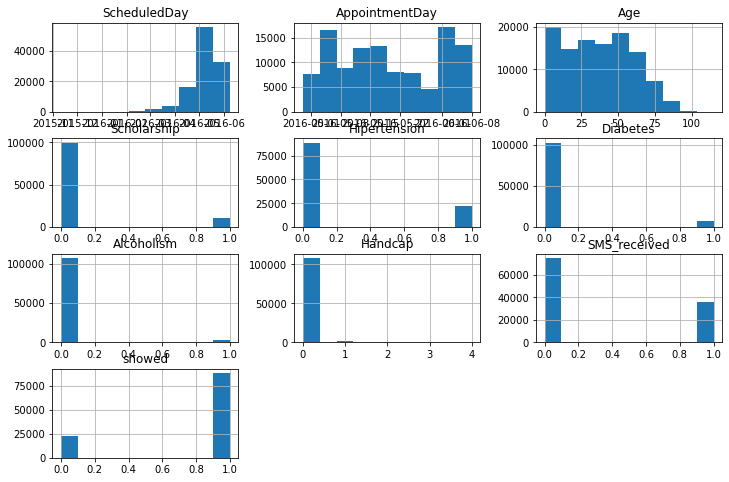

In [20]:
#aperçu rapide de notre jeu de données 
df.hist(figsize=(12, 8));

On obtient une aperçue superflue des colones de notres jeu de données 

<a id='eda'></a>
# ANALYSE EXPLORATOIRE DES DONNES 

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.



### Recherche Question 1 (Pourcentage de patients boursiers par rapport au nombre total de patients)

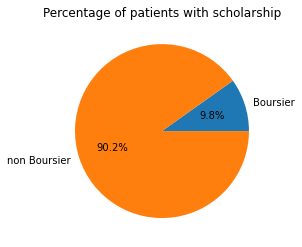

<Figure size 720x720 with 0 Axes>

In [21]:
#pourcentage de patients boursiers

scho = (df['Scholarship'] == True).sum() #patients boursier 
no_scho = (df['Scholarship'] == False).sum() # patients non boursier
value = [scho, no_scho]
label = ('Boursier','non Boursier')

#visualisation
plt.pie(value, labels = label, autopct= '%.1f%%')
plt.title('Percentage of patients with scholarship')
plt.figure(figsize=(10,10))
plt.show()

Nous utilisons ici un graphique à secteur qui nous permet une lecture bien visible et compréhensive de nos données 
on constate que 90% des patients est boursié. un graphuique à peut etre utilisé.

## Recherche Question 2 (Combien de personnes viennent au rendez-vous ?)

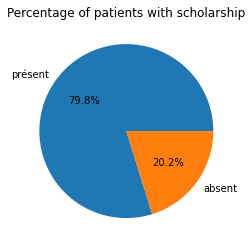

<Figure size 720x720 with 0 Axes>

In [22]:
#pourcentage d'assiduité au rendez-vous'

showed = (df['showed'] == True).sum() #patients boursier 
no_showed = (df['showed'] == False).sum() # patients non boursier
value = [showed, no_showed]
label = ('présent','absent')

#visualisation
plt.pie(value, labels = label, autopct= '%.1f%%')
plt.title('Percentage of patients with scholarship')
plt.figure(figsize=(10,10))
plt.show()

Nous utilisons ici un graphique à secteur qui nous permet une lecture bien visible et compréhensive de nos données 
on constate que seuleent 79.8% des patients sont venu à leur rendez vous. un graphuique à peut etre utilisé.

### Recherche question 3 (quel est la ratio d'assiduité en fonction du sexe?)

In [23]:
df.Gender.value_counts()      

F    71839
M    38687
Name: Gender, dtype: int64

In [24]:
#proportion des femmes 
Female_rat = df.Gender.value_counts()[0] / df.shape[0]
Female_rat

0.6499737618297957

In [25]:
#proportion des hommes
Male_rat = df.Gender.value_counts()[1] / df.shape[0]
Male_rat

0.3500262381702043

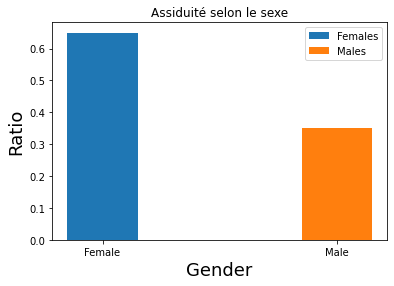

In [26]:
Female_bar = plt.bar(0, Female_rat, width=.3, alpha=1, label='Females' )
Male_bar = plt.bar(1, Male_rat, width=.3, alpha=1, label='Males')

# titre et labels
plt.xticks([0, 1], ['Female', 'Male'])
plt.xlabel('Gender', fontsize=18)
plt.ylabel('Ratio', fontsize=18)
plt.title('Assiduité selon le sexe');
plt.legend();

Ici, on cherche à déterminer la ratio d'assiduité selon le texte. J'ai préféré utilisé le graphiqque à barre que le graphique à secteur par exmple mais on aurait pu utiliser un histogramme pour la visualisation. on constate que les femmes sont beaucoup plus assidus que les hommes. Cependant n'oublions pas la différence de proportion de chaque genre. Celà pourrait en etre la cause. 

### Research Question 4  (Lequel des hommes et des femmes est le plus déterminé à assister à un rendez-vous?)

In [27]:
#on groupe le nombre de participant au rendez-vous en fonction du sexe
df.groupby('Gender').showed.value_counts()

Gender  showed
F       1         57245
        0         14594
M       1         30962
        0          7725
Name: showed, dtype: int64

In [28]:
#on obtient la moyenne de participation en fonction du sexe 
df.groupby('Gender')['showed'].mean()

Gender
F    0.796851
M    0.800321
Name: showed, dtype: float64

In [29]:
def plotting(a,b):
    df.groupby([a])['Gender'].count().plot(kind = b,color=['blue', 'orange'])
    plt.xticks([0, 1], ['Female', 'Male'])
    plt.title("Gender per "+ a,fontsize=18)
    plt.xlabel('genre',fontsize=18)
    plt.ylabel(a, fontsize=18)
    c = df.groupby([a])['Gender'].count()
    print(c)

showed
0    22319
1    88207
Name: Gender, dtype: int64


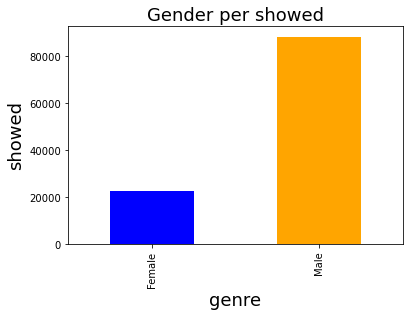

In [30]:
plotting('showed','bar')

On remarque que que les hommes sont plus assidu par rapport aux femmes ,cependant vue la différence des proportions de chaque genre, un ajustement pourrait changer la donne ou avoir une modification de la visualtion.

### Question 5 (quel sexe peut etre le plus alcoolique ?)

In [31]:
df.groupby('Gender')['Alcoholism'].mean()

Gender
F    0.017024
M    0.055238
Name: Alcoholism, dtype: float64

Alcoholism
0    107166
1      3360
Name: Gender, dtype: int64


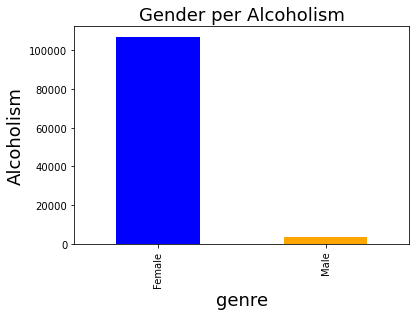

In [32]:
plotting('Alcoholism','bar')

On remarque seulement tout un petit poigné d'homme alocolhique comparé aux qui sont quasi total alcolhique. Cependant n'oublions pas la différence de proportion de chaque genre. Celà pourrait en etre la cause. 

### recherche question 6 (l'age a t'il un impact sur l'assiduité ?)

In [33]:
#aperçu rapide de la satistique descriptives 
df.Age.describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


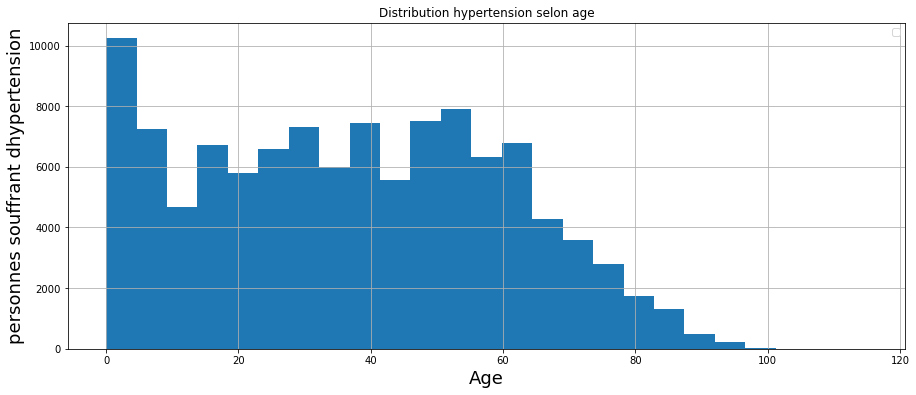

In [34]:
df.Age.hist(bins=25, figsize=(15,6))
plt.title('Distribution hypertension selon age')
plt.xlabel('Age', fontsize=18)
plt.ylabel('personnes souffrant dhypertension', fontsize=18)
plt.legend();

Nous avons utilisé un histogramme dans ce cas précis pour le taux de personne atteind de l'hypertension en fonction de l'age, avec les données de durrée comme age, date(temporaire) il est préféerable d'utiliser des histogrammes. on remque que le nombre de personne touché par l'hypertension diffère en fonction de la tranche d'age des patients.  

<a id='conclusions'></a>
# CONCLUSIONS

 Question 1 :Combien de personnes viennent au rendez-vous ?
on constate que les personnes qui prennent part au rendez sont de 0.8/1, inversement 0.2/1

Question 2: quel est la ratio d'assiduité en fonction du sexe?
On constate que les femmes sont plus assidus par rapport aux hommmes.

 Question 3:Lequel des hommes et des femmes est le plus déterminé à assister à un rendez-vous?
Quelque soit le sexe, les deux parties présentent la meme motivation pour etre au rendez-vous

 Question 4:l'age a t'il un impact sur l'assiduité ?
 La moyenne générale des patients est de 33 Ans 
 
 Question 5 : quel sexe peut etre le plus alcoolique ?
     le taux d'alcoolisme est 0.17/1 pour les femmes et 0.55 pour les hommes
 
Il y a 13 variables indépendante et 1 variable dépendante (No-show)

DISCLAIM: 
l'exploration des données peut aller au delà,  nous pouvons affiner nos exploration sur les points suivants: 
-  Scolarship elle associée à un taux de participation plus élevé?
- l'handicap a t-il un impact sur l'assiduité au rendez-vous 
- quelle est la proportion d'handicap par sexe
-etc..

> JE SUIS L'ETUDIANT KOUAME EFFI KENAZ YAO OTHNEL, J'AVAIS SIGNALE MON ETAT DE SANTE QUI ME PERMETTTAIT PAS DE BIEN SUIVRE REGULIEREMENT LES SEANCES 

# LIMITATIONS